In [ ]:
import numpy as np
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFE
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from google.colab import files

In [ ]:
## ALL TRAINING CLEANING

training_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv')


#dealing with na values -- three cols have less than 300 observations in them
na_cols = training_data[training_data.columns[training_data.isnull().any()]]
na_cols.isna().sum()
training_data = training_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Id'], axis=1)

#dropping one missing observation with no electrical value
training_data = training_data.dropna(axis = 0, subset = ["Electrical"])

#filling na values here
#dealing with basement
training_data[['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2']] = training_data[['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2']].fillna('None')
training_data[['TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtFullBath', 'BsmtHalfBath']] = training_data[['TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtFullBath', 'BsmtHalfBath']].fillna(0)


#dealign with garage
training_data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = training_data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('None')
training_data[['GarageYrBlt', 'GarageCars', 'GarageArea']] = training_data[['GarageYrBlt', 'GarageCars', 'GarageArea']].fillna(0)

#dealing with fence
training_data[['Fence']] = training_data[['Fence']].fillna('None')

#dealing with fireplace
training_data[['FireplaceQu']] = training_data[['FireplaceQu']].fillna('None')

training_data[['MasVnrArea']] = training_data[['MasVnrArea']].fillna(0)
training_data[['MasVnrType']] = training_data[['MasVnrType']].fillna('None')

training_data[['LotFrontage']] = training_data[['LotFrontage']].fillna(training_data['LotFrontage'].median())

#creating dummy variables for categorical variables
training_data = pd.get_dummies(training_data)

#train test split
prices = training_data['SalePrice']
features = training_data.drop(columns=['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=0)

training_data = training_data.drop(columns=['SalePrice'])
X_test.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1420,60,90.0,11700,6,6,1968,1968,420.0,404,0,...,0,0,0,1,0,0,0,0,1,0
494,30,50.0,5784,5,8,1938,1996,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1412,90,60.0,7200,4,5,1949,1950,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
569,90,69.0,7032,5,5,1979,1979,0.0,943,0,...,0,0,0,1,0,0,0,0,1,0
486,20,79.0,10289,5,7,1965,1965,168.0,836,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
## ALL TESTING CLEANING

#save the ID
testing_id = testing_data['Id']

#dealing with na values -- three cols have less than 300 observations in them
na_cols = testing_data[testing_data.columns[testing_data.isnull().any()]]
na_cols.isna().sum()
testing_data = testing_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Id'], axis=1)


#filling na values here
#dealing with basement
testing_data[['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2']] = testing_data[['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna('None')
# na_cols = testing_data[testing_data.columns[testing_data.isnull().any()]]
# print(na_cols.isna().sum())
testing_data[['TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtFullBath', 'BsmtHalfBath']] = testing_data[['TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtFullBath', 'BsmtHalfBath']].fillna(0)



#dealign with garage
testing_data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',]] = testing_data[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('None')
testing_data[['GarageYrBlt', 'GarageCars', 'GarageArea']] = testing_data[['GarageYrBlt', 'GarageCars', 'GarageArea']].fillna(0)


#dealing with fence
testing_data[['Fence']] = testing_data[['Fence']].fillna('None')


#dealing with fireplace
testing_data[['FireplaceQu']] = testing_data[['FireplaceQu']].fillna('None')


testing_data[['MasVnrArea']] = testing_data[['MasVnrArea']].fillna(0)
testing_data[['MasVnrType']] = testing_data[['MasVnrType']].fillna('None')


testing_data[['LotFrontage']] = testing_data[['LotFrontage']].fillna(testing_data['LotFrontage'].median())


#creating dummy variables for categorical variables
testing_data = pd.get_dummies(testing_data)
na_cols = testing_data[testing_data.columns[testing_data.isnull().any()]]
print(na_cols.isna().sum())

# Get missing columns in the training test
missing_cols = set( training_data.columns ) - set( testing_data.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    testing_data[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test = testing_data[training_data.columns]

testing_data.head()




Series([], dtype: float64)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Exterior2nd_Other,Utilities_NoSeWa,RoofMatl_Membran,Electrical_Mix,Exterior1st_ImStucc,RoofMatl_ClyTile,Heating_OthW,Condition2_RRNn,Condition2_RRAe,Condition2_RRAn
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

#feature selection -- using random forest regressor
rf_reg = RandomForestRegressor(n_estimators = 1000, max_depth=10)
rf_reg.fit(X_train, y_train)
y_test_hat = rf_reg.predict(X_test)

#R^2 and explained variance metric
r2 = r2_score(y_test,y_test_hat)
mse = mean_squared_error(y_test, y_test_hat)
print(r2, mse)

# using model to predict test.csv prices

predicted_prices = rf_reg.predict(testing_data)
lst  = list(zip(testing_id, predicted_prices))
df_predictions_lreg = pd.DataFrame(lst, columns = ['Id', 'SalePrice'])
df_predictions_lreg.to_csv('kagglesubmission_random_reg.csv', index=False)
files.download('kagglesubmission_random_reg.csv')

0.8849513366951907 699269276.2458379


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ValueError: ignored

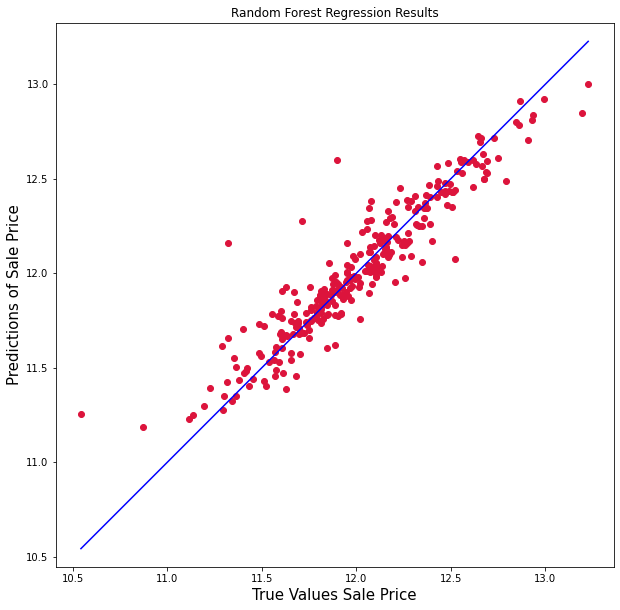

In [ ]:
import matplotlib.pyplot as plt

true_value = y_test
predicted_value = y_test_hat

plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values Sale Price', fontsize=15)
plt.ylabel('Predictions of Sale Price', fontsize=15)
plt.axis('equal')
plt.title('Random Forest Regression Results')
plt.show()

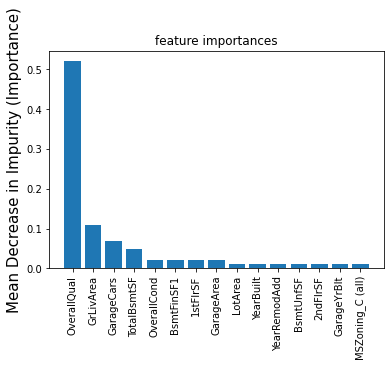

(0.52, 0.11, 0.07, 0.05, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01)


In [ ]:
features_list = list(features.columns)
importances = list(rf_reg.feature_importances_)

labeled_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]


labeled_importances = sorted(
    labeled_importances,
    key=lambda t: t[1],
    reverse = True
)

features, importances = zip(*labeled_importances)
indices = range(len(importances[0:15]))

plt.bar(indices, importances[0:15], orientation = 'vertical')
plt.title('feature importances')
plt.xticks(indices, features, rotation='vertical')
plt.ylabel('Mean Decrease in Impurity (Importance)', fontsize=15)
plt.show()

print(importances[0:15])

In [ ]:
#Linear Regression With these features
print(features[0:17])
X_train_red = X_train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'OverallCond', 'BsmtFinSF1', '1stFlrSF', 'GarageArea', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', '2ndFlrSF', 'GarageYrBlt', 'MSZoning_C (all)', 'MSSubClass', 'LotFrontage']]
X_test_red =  X_test[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'OverallCond', 'BsmtFinSF1', '1stFlrSF', 'GarageArea', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', '2ndFlrSF', 'GarageYrBlt', 'MSZoning_C (all)', 'MSSubClass', 'LotFrontage']]

model = LinearRegression().fit(X_train_red, y_train)
y_hat_test = model.predict(X_test_red)
print(y_hat_test)
mse_linear_regression = mean_squared_error(y_test, y_hat_test)
print(mse)

# using model to predict test.csv prices
testing_set = testing_data[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'OverallCond', 'BsmtFinSF1', '1stFlrSF', 'GarageArea', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', '2ndFlrSF', 'GarageYrBlt', 'MSZoning_C (all)', 'MSSubClass', 'LotFrontage']]

predicted_prices = model.predict(testing_set)
lst  = list(zip(testing_id, predicted_prices))
df_predictions_lreg = pd.DataFrame(lst, columns = ['Id', 'SalePrice'])
df_predictions_lreg.to_csv('kagglesubmission_linear_reg.csv', index=False)
files.download('kagglesubmission_linear_reg.csv')



('OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'OverallCond', 'BsmtFinSF1', '1stFlrSF', 'GarageArea', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', '2ndFlrSF', 'GarageYrBlt', 'MSZoning_C (all)', 'CentralAir_Y', 'MSSubClass')
[11.95329507 11.67544053 11.49813036 11.79947059 11.90408835 11.74079951
 11.98100628 12.13513518 11.45076669 11.54639585 11.65288373 12.56410665
 11.58671577 12.2503659  12.51708262 12.08462075 11.94175935 12.70397858
 12.60702999 11.94669428 12.75901673 11.35722608 11.83373418 12.11030592
 12.15169189 12.07341423 11.81720761 12.39554711 11.10087189 12.6833975
 11.62814882 11.96447563 11.96015232 11.98288633 12.33954607 12.43626624
 11.7312357  12.12015143 11.71942841 11.68826693 11.66252037 11.9976207
 12.29465044 11.34304324 11.75654669 12.26931486 12.09711495 12.14582699
 11.65554981 12.42805348 12.50601429 12.07246307 11.21012808 11.34041368
 11.7737415  11.8285817  12.42225821 12.40421352 12.68292061 11.99221569
 12.42389898 12.20915927 12.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Feature selction try again
lasso_model = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)
X_train_red = X_train[:,lasso_model.coef_!=0]
X_test_red = X_test[:,lasso_model.coef_!=0]

In [ ]:
lasso_reg = Lasso().fit(X_train_red, y_train)
predictions = lasso_reg.predict(X_test_red)

mse_lasso_regression = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test,predictions)
print(r2)
print(mse_lasso_regression)


-0.003410947384824059
0.16532210054526314


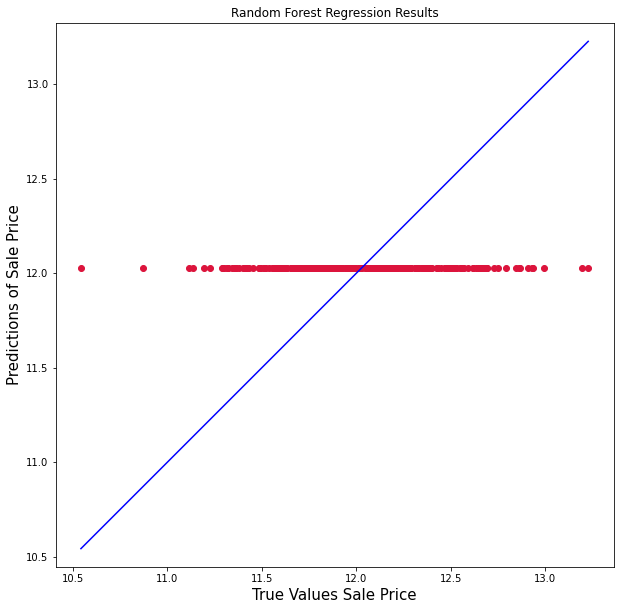

In [ ]:
true_value = y_test
predicted_value = predictions

plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values Sale Price', fontsize=15)
plt.ylabel('Predictions of Sale Price', fontsize=15)
plt.axis('equal')
plt.title('Random Forest Regression Results')
plt.show()

In [ ]:
#hyperparameter alpha tuning time
std_slc = StandardScaler()
pca = decomposition.PCA()
lasso = linear_model.Lasso()

pipe = Pipeline(steps=[("std_slc", std_slc),
                           ("pca", pca),
                           ("lasso", lasso)])

n_components = list(range(1,X_train.shape[1]+1,1))

normalize = [True, False]
selection = ["cyclic", "random"]

parameters = dict(pca__n_components=n_components,
                      lasso__normalize=normalize,
                      lasso__selection=selection)

clf = GridSearchCV(pipe, parameters).fit(X_train, y_train)

print("Best Number Of Components:", clf.best_estimator_.get_params()["pca__n_components"])
print(clf.best_estimator_.get_params()["lasso"])

CV_Result = cross_val_score(clf, X_train, y_train, cv=10, n_jobs=-1)
print(CV_Result)
print(CV_Result.mean())
print(CV_Result.std())

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in ve

Best Number Of Components: 39
Lasso(normalize=False)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


[0.45817213 0.34710874 0.3535252  0.39033683 0.32201094 0.40509056
 0.32028892 0.40387877 0.38914843 0.38292946]
0.37724899881731455
0.040180784035449134


In [ ]:
print("Best Number Of Components:", clf.best_estimator_.get_params()["pca__n_components"])
print(clf.best_estimator_.get_params()["lasso"])

Best Number Of Components: 39
Lasso(normalize=False)


In [ ]:
print(CV_Result)
print(CV_Result.mean())
print(CV_Result.std())

[0.45817213 0.34710874 0.3535252  0.39033683 0.32201094 0.40509056
 0.32028892 0.40387877 0.38914843 0.38292946]
0.37724899881731455
0.040180784035449134


array([0.45817213, 0.34710874, 0.3535252 , 0.39033683, 0.32201094,
       0.40509056, 0.32028892, 0.40387877, 0.38914843, 0.38292946])